## NLP Yelp Star Classification

**Columns**  
stars: number of stars (1 to 5)  
cool: number of likes on the review (0 or plus)  
useful and funny =~ cool  




In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file = "//home//vinicius//Data_Science//Notebooks//Data_Files//yelp.csv"

In [3]:
df1 = pd.read_csv(file)

In [4]:
df1.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [9]:
df1.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [10]:
df1['txt_lenght'] = df1.text.apply(len)

In [11]:
df1.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,txt_lenght
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


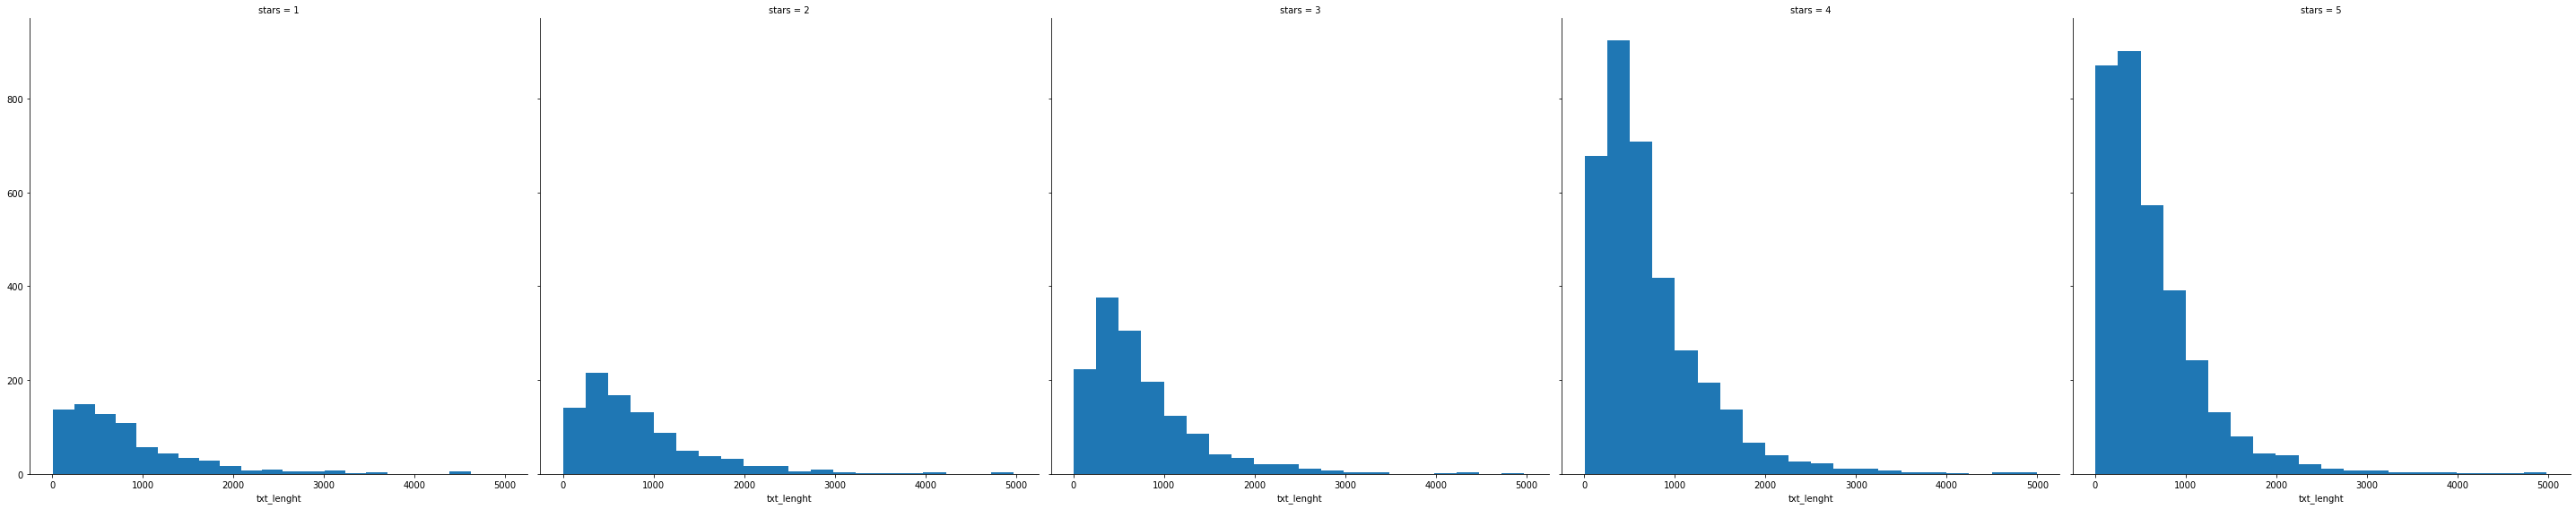

In [31]:
g = sns.FacetGrid(df1,col='stars',height=8)
g.map(plt.hist, 'txt_lenght', bins=20)

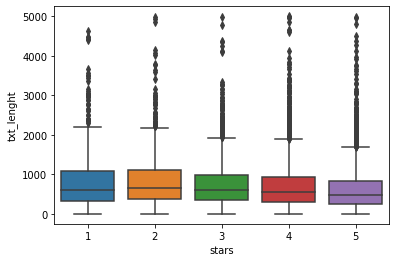

In [34]:
sns.boxplot(x='stars', y='txt_lenght', data=df1)

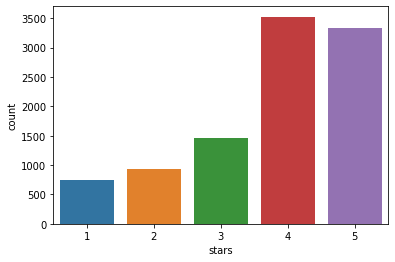

In [35]:
sns.countplot(x='stars', data=df1)

In [37]:
stars = df1.groupby('stars').mean()
stars

,cool,useful,funny,txt_lenght
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [38]:
stars.corr()

,cool,useful,funny,txt_lenght
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
txt_lenght,-0.857664,0.699881,0.843461,1.000000


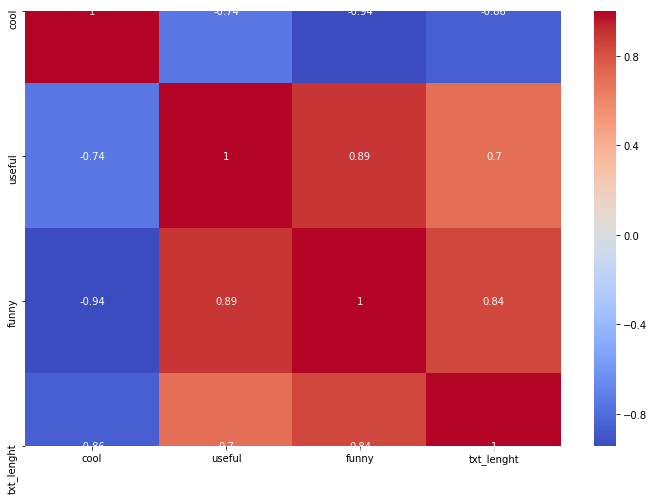

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(stars.corr(),cmap='coolwarm', annot=True)

## Classification

In [54]:
df1.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [124]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [152]:
yelp_class = df1[(df1.stars==1) | (df1.stars==3) |(df1.stars==5)]

In [153]:
X = yelp_class['text']
y = yelp_class['stars']

In [154]:
cv = CountVectorizer()

In [155]:
X = cv.fit_transform(X)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [157]:
nb = MultinomialNB()

In [158]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [159]:
pred = nb.predict(X_test)

In [160]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[107  85  51]
 [ 13 255 174]
 [ 20  59 901]]


              precision    recall  f1-score   support

           1       0.76      0.44      0.56       243
           3       0.64      0.58      0.61       442
           5       0.80      0.92      0.86       980

    accuracy                           0.76      1665
   macro avg       0.73      0.65      0.67      1665
weighted avg       0.75      0.76      0.75      1665



**1 or 5 stars -> precision = 92%**
Using this method, acurracy is compromised if increase the range of classification  
lets try with pipeline and check results


In [161]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [162]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [163]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [165]:
pred = pipeline.predict(X_test)

In [167]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0   0 243]
 [  0   1 441]
 [  0   0 980]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       243
           3       1.00      0.00      0.00       442
           5       0.59      1.00      0.74       980

    accuracy                           0.59      1665
   macro avg       0.53      0.33      0.25      1665
weighted avg       0.61      0.59      0.44      1665



/home/vinicius/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**get worse**
lets try with random forests classifier

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [170]:
pipeline.fit(X_train, y_train)

/home/vinicius/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [171]:
pred = pipeline.predict(X_test)

In [172]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 29  58 156]
 [ 14 174 254]
 [  7  85 888]]
              precision    recall  f1-score   support

           1       0.58      0.12      0.20       243
           3       0.55      0.39      0.46       442
           5       0.68      0.91      0.78       980

    accuracy                           0.66      1665
   macro avg       0.60      0.47      0.48      1665
weighted avg       0.63      0.66      0.61      1665



**A little better but not enough**  
Try another aporach (another notebook)